In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import IPython

sns.set(color_codes=True)

In [3]:
f = np.load('../mnist_logreg_lbfgs_retraining-500.npz')
# If running outside of Codalab, change this to
# f = np.load('../output/mnist_logreg_lbfgs_retraining-500.npz')

actual_loss_diffs = f['actual_loss_diffs']
predicted_loss_diffs_cg = f['predicted_loss_diffs_cg']
predicted_loss_diffs_lissa = f['predicted_loss_diffs_lissa']
indices_to_remove = f['indices_to_remove']

In [4]:
f = np.load('../mnist_small_all_cnn_c_iter-500k_retraining-100.npz')
# If running outside of Codalab, change this to
# f = np.load('../output/mnist_small_all_cnn_c_iter-500k_retraining-100.npz')

nn_actual_loss_diffs = f['actual_loss_diffs']
nn_predicted_loss_diffs = f['predicted_loss_diffs']
nn_indices_to_remove = f['indices_to_remove']

print(pearsonr(nn_actual_loss_diffs[-100:], nn_predicted_loss_diffs[-100:])[0])

0.875447276976


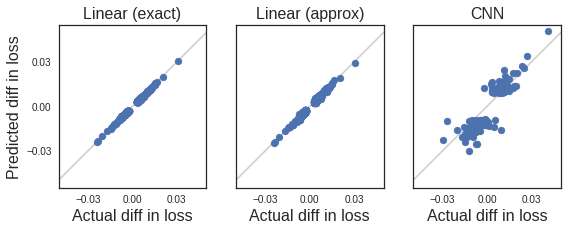

In [6]:
sns.set_style('white')
fontsize=16
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(9, 3))

for ax in axs: 
    ax.set_aspect('equal')
    ax.set_xlabel('Actual diff in loss', fontsize=fontsize)
    ax.set_xticks(np.arange(-0.06, 0.06, 0.03))
    ax.set_yticks(np.arange(-0.06, 0.06, 0.03))
    ax.set_xlim([-0.05, 0.05])
    ax.set_ylim([-0.05, 0.05])
    ax.plot([-0.05, 0.05], [-0.05, 0.05], 'k-', alpha=0.2, zorder=1)
axs[0].set_ylabel('Predicted diff in loss', fontsize=fontsize)

axs[0].scatter(actual_loss_diffs, predicted_loss_diffs_cg, zorder=2)
axs[0].set_title('Linear (exact)', fontsize=fontsize)
axs[1].scatter(actual_loss_diffs, predicted_loss_diffs_lissa, zorder=2)
axs[1].set_title('Linear (approx)', fontsize=fontsize)
axs[2].scatter(nn_actual_loss_diffs, nn_predicted_loss_diffs, zorder=2)
axs[2].set_title('CNN', fontsize=fontsize)

# plt.savefig('../figs/fig-approx.png', dpi=600, bbox_inches='tight')